In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
airpass=pd.read_csv(r'..\Datasets\AirPassengers.csv',index_col=0)
airpass.index=pd.DatetimeIndex(airpass.index)
airpass.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


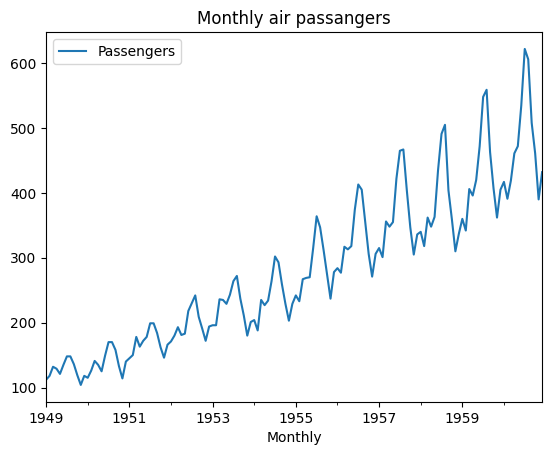

In [5]:
airpass.plot()
plt.title("Monthly air passangers")
plt.xlabel("Monthly")
plt.show()

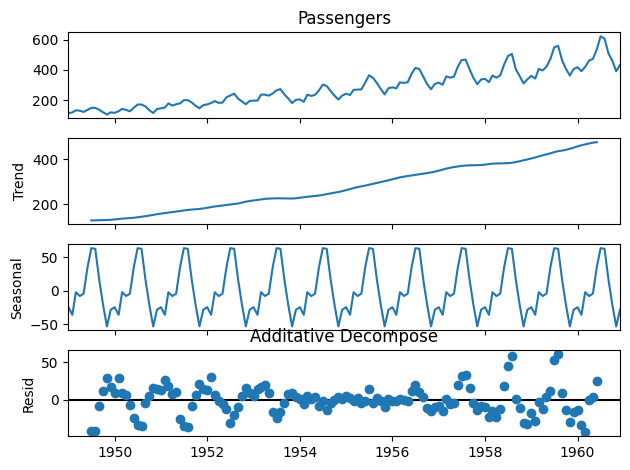

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=airpass['Passengers']
results=seasonal_decompose(series,model='additive',period=12)
results.plot()
plt.title("Additative Decompose")
plt.show()

In [9]:
y=airpass['Passengers']
y_train=y.iloc[:-12,]
y_test=y.iloc[-12:,]

## Additive

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='add')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,g,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
499,0.056842,0.197368,0.900000,15.433116
498,0.056842,0.197368,0.853158,15.528524
2036,0.244211,0.056842,0.759474,15.571445
2035,0.244211,0.056842,0.712632,15.598292
2037,0.244211,0.056842,0.806316,15.610548


## Multiplicative

In [18]:
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='mul')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,g,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
1187,0.103684,0.900000,0.337895,13.368430
868,0.103684,0.150526,0.384737,13.559130
869,0.103684,0.150526,0.431579,13.603122
1248,0.150526,0.103684,0.384737,13.625728
1247,0.150526,0.103684,0.337895,13.658857
